In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Условие 1: Задача 1
1.1. Постройте график / Назовите график / Сделайте именование оси x и оси y / Сделайте выводы
1.2. Изучите стоимости недвижимости
1.3. Изучите распределение квадратуры жилой
1.4. Изучите распределение года постройки

In [7]:
df = pd.read_csv("kc_house_data.csv", encoding='windows-1251')

In [8]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


1.2. Изучите стоимости недвижимости

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

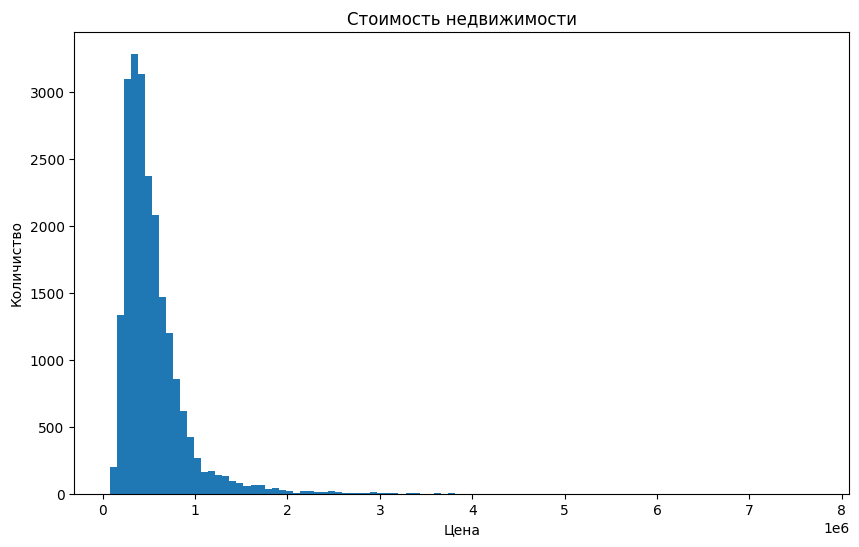

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=100)
plt.title('Стоимость недвижимости')
plt.xlabel('Цена')
plt.ylabel('Количиство')
df['price'].describe()

1.3. Изучите распределение квадратуры жилой

count    21613.000000
mean      2079.899736
std        918.440897
min        290.000000
25%       1427.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

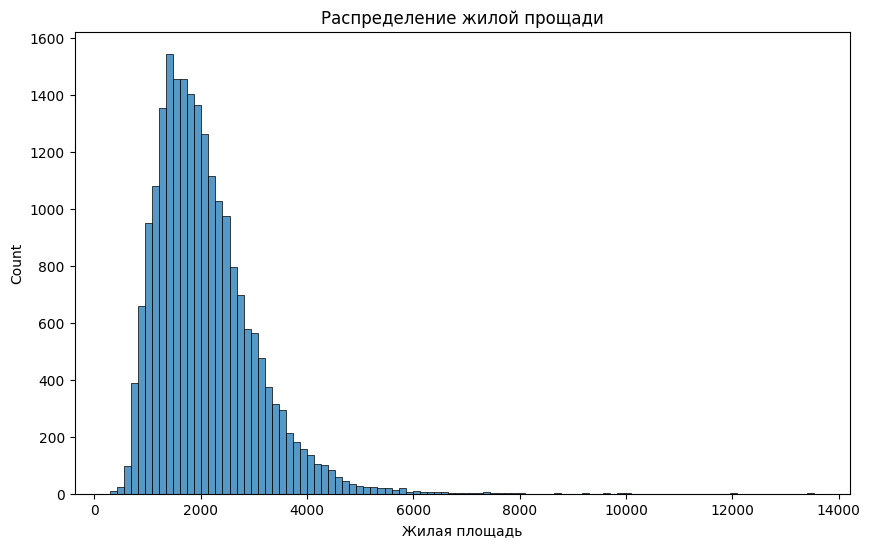

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['sqft_living'], bins=100)
plt.title('Распределение жилой прощади')
plt.xlabel('Жилая площадь')
df['sqft_living'].describe()

1.4. Изучите распределение года постройки

count    21613.000000
mean      1971.005136
std         29.373411
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

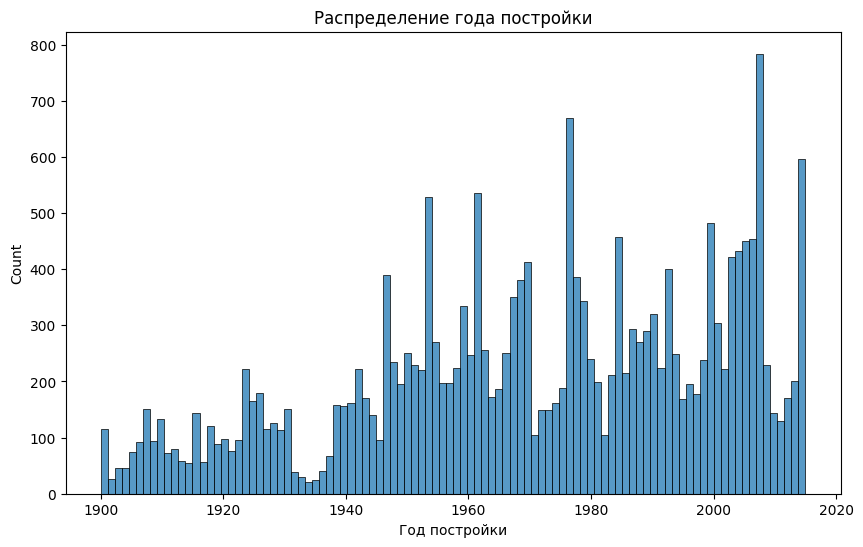

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['yr_built'], bins=100)
plt.title('Распределение года постройки')
plt.xlabel('Год постройки')
df['yr_built'].describe()

### Условие 2: 2 задача
2.1. Изучите распределение домов от наличия вида на набережную
Постройте график
Сделайте выводы
2.2. Изучите распределение этажей домов
2.3. Изучите распределение состояния домов

2.1. Изучите распределение домов от наличия вида на набережную
Постройте график
Сделайте выводы

In [36]:
data = df['waterfront'].value_counts()
data.index = ['нет', 'да']
data.head()

нет    21450
да       163
Name: count, dtype: int64

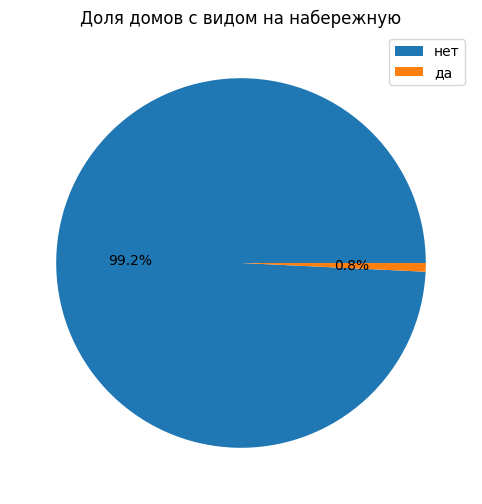

In [37]:
plt.figure(figsize=(10, 6))
plt.pie(data, autopct='%1.1f%%')
plt.title('Доля домов с видом на набережную')
plt.legend(data.index);

2.2. Изучите распределение этажей домов

In [14]:
data = df['floors'].value_counts()
data

floors
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: count, dtype: int64

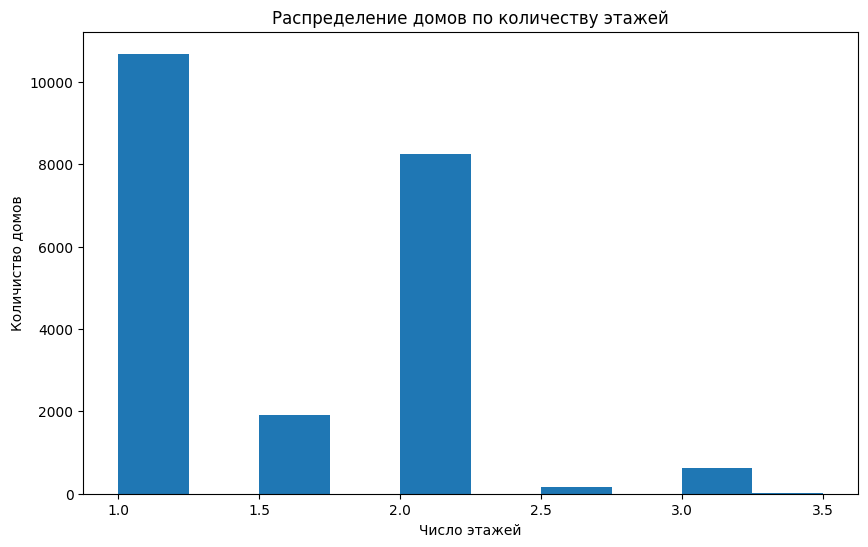

In [15]:
plt.figure(figsize=(10, 6))

plt.hist(df['floors'])

plt.title('Распределение домов по количеству этажей')
plt.xlabel('Число этажей')
plt.ylabel('Количиство домов');

2.3. Изучите распределение состояния домов

In [16]:
data = df['grade'].value_counts()
data

grade
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: count, dtype: int64

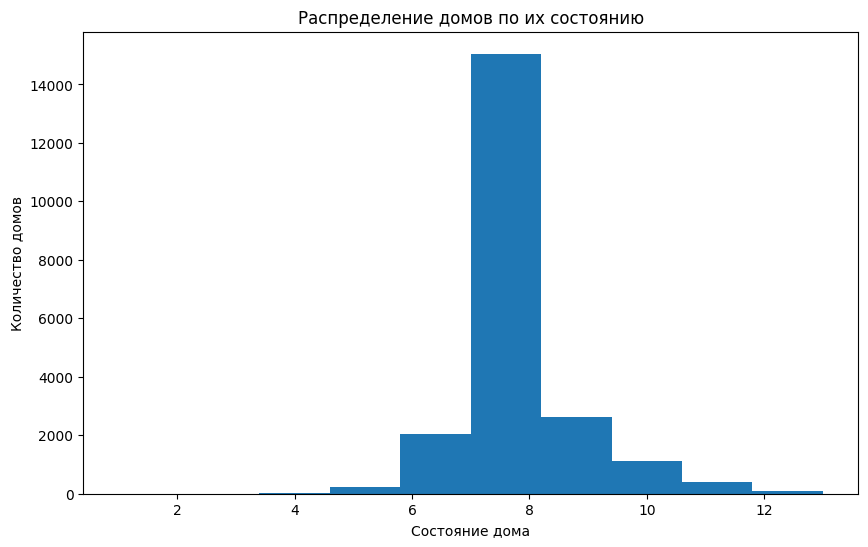

In [44]:
plt.figure(figsize=(10, 6))

plt.hist(df['grade'])

plt.title('Распределение домов по их состоянию')
plt.xlabel('Состояние дома')
plt.ylabel('Количество домов');

### Условие 3: 3 задача
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

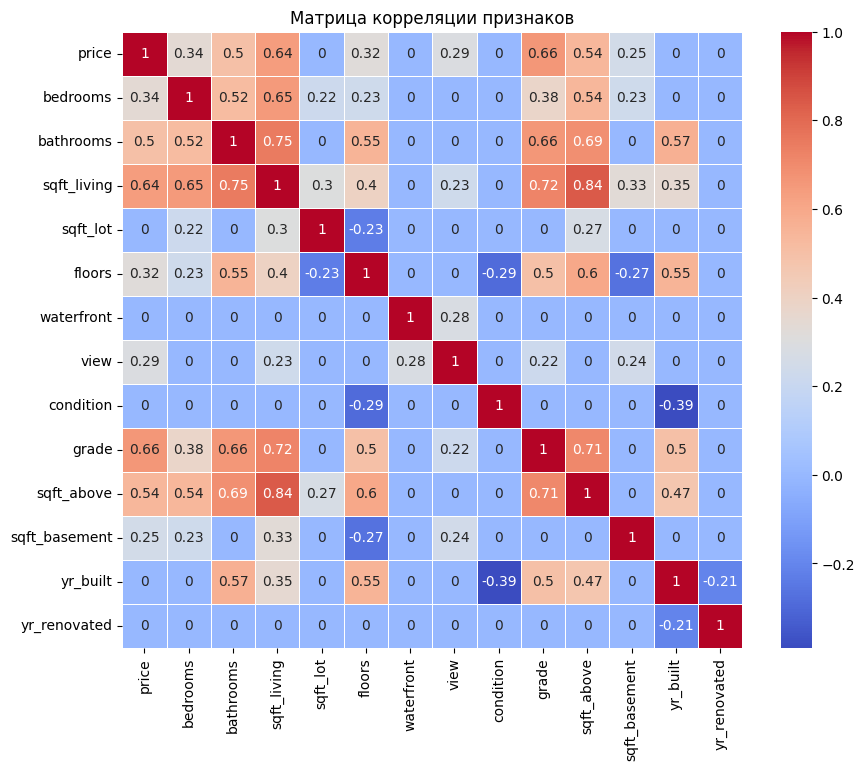

In [26]:
plt.figure(figsize=(10, 8))

corrMatrix = round(df.drop(
    columns=['id', 'date', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
).corr(method='spearman'), 2)
corrMatrix[abs(corrMatrix) < 0.2] = 0

sns.heatmap(corrMatrix, annot=True, linewidths=.5, cmap='coolwarm')
plt.title("Матрица корреляции признаков");

Зависимость цены от жилой площади:

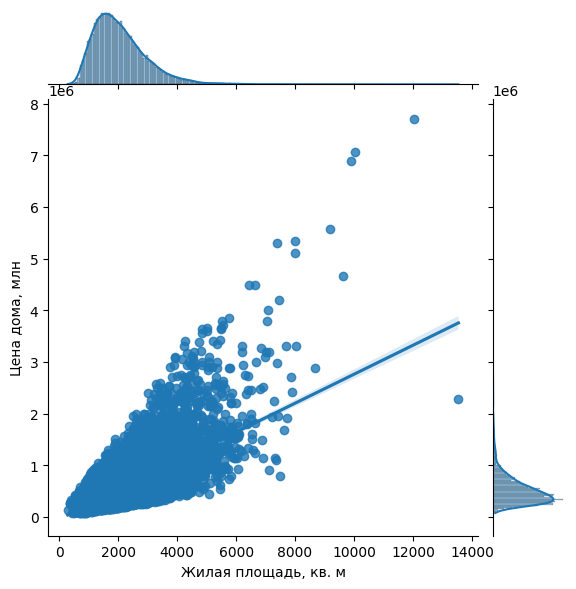

In [28]:
sns.jointplot(x=df['sqft_living'], y=df['price'], kind='reg')

plt.xlabel("Жилая площадь, кв. м")
plt.ylabel("Цена дома, млн");

Вывод: Имеется выраженная зависимость цены от жилой площади, зависимость более чёткая в нижнем ценовом диапазоне и для небольших площадей. Большой разброс цен домов большой площади говорит о влиянии других факторов и специфичности требований покупателей.

In [29]:
def formDepData (col1, col2, df):
    data = df.groupby(col1) \
        .agg({col2: 'mean'}) \
        .sort_index().reset_index()
    
    data[col1] = data[col1].apply(
        lambda val:
            str(val) 
    )

    return data

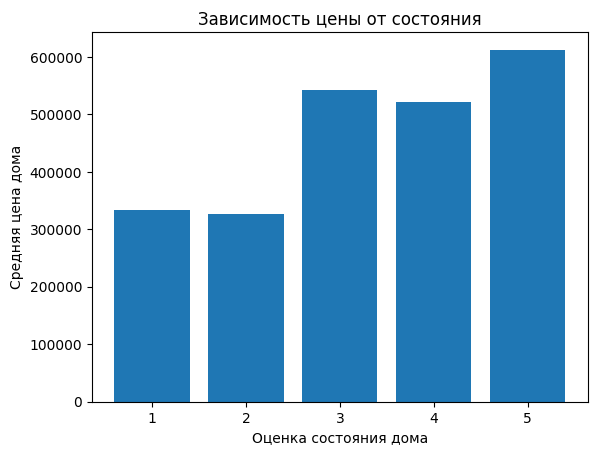

In [30]:
data = formDepData('condition', 'price', df)

plt.bar(
    data['condition'],
    data['price']
)

plt.title("Зависимость цены от состояния")
plt.xlabel("Оценка состояния дома")
plt.ylabel("Средняя цена дома");

Вывод: Не смотря на низкий коэффициент корреляции, на диаграмме прослеживается некоторое увеличение цены для домов в лучшем состоянии. Слабая выраженность зависимости связана с малой долей домов в плохом состоянии.

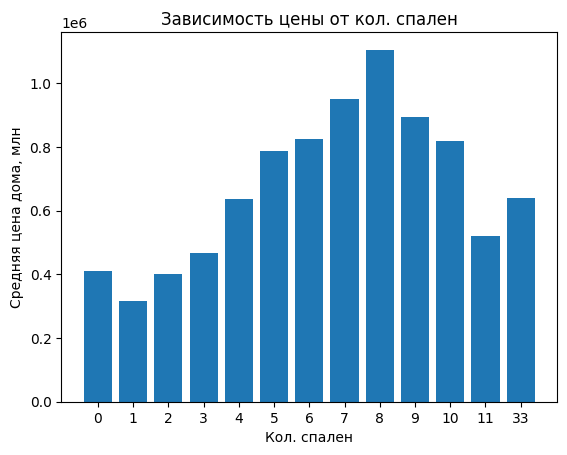

In [31]:
data = formDepData('bedrooms', 'price', df)

plt.bar(
    data['bedrooms'],
    data['price']
)

plt.title("Зависимость цены от кол. спален")
plt.xlabel("Кол. спален")
plt.ylabel("Средняя цена дома, млн");

Вывод: Дома без спален, ориентированы на какие-то специальые требования (возможно, студии), что делает их немного дороже, чем дома с 2-мя спальнями. Для домов с 1 по 8 спален прослеживается равномерный рост цены. Дома с большим количеством спален, ориентированы на несколько семей, имеют более простые условия, и уменьшаются в цене.

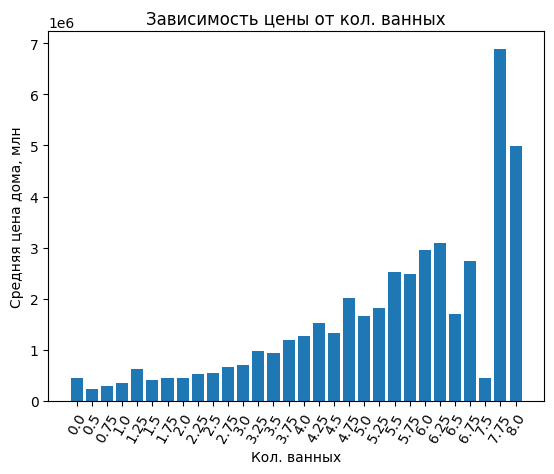

In [32]:
data = formDepData('bathrooms', 'price', df)

plt.bar(
    data['bathrooms'],
    data['price']
)

plt.xticks(rotation=60)
plt.title("Зависимость цены от кол. ванных")
plt.xlabel("Кол. ванных")
plt.ylabel("Средняя цена дома, млн");

Вывод: Наблюдается практически равномерный рост цен при увеличении числа ванных. Есть выбросы, соответствующие, домам типа townhouse.

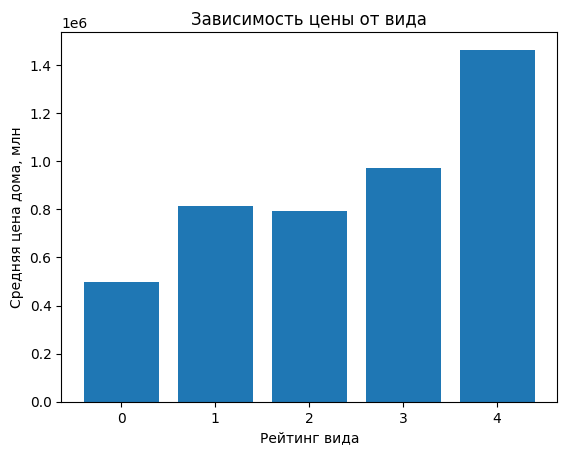

In [33]:
data = formDepData('view', 'price', df)

plt.bar(
    data['view'],
    data['price']
)

plt.title("Зависимость цены от вида")
plt.xlabel("Рейтинг вида")
plt.ylabel("Средняя цена дома, млн");

Вывод: Не смотря на низкий коэффициент корреляции, на диаграмме прослеживается увеличение цены для домов с лучшим видом. Слабая выраженность зависимости говорит о большом влиянии других факторов.

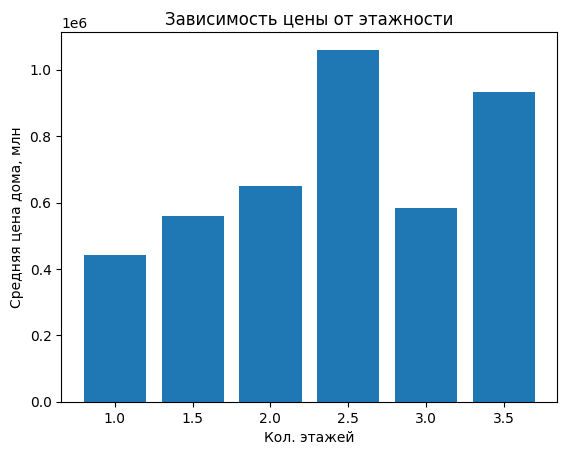

In [34]:
data = formDepData('floors', 'price', df)

plt.bar(
    data['floors'],
    data['price']
)

plt.title("Зависимость цены от этажности")
plt.xlabel("Кол. этажей")
plt.ylabel("Средняя цена дома, млн");

Вывод: Для домов с этажностью с 1 по 2.5 прослеживается равномерный рост цены. Дома с большей этажностью, ориентированы на несколько семей, имеют более простые условия, и меньшую цену, которая, также имеет тенденцию к увеличению при добавлении полуэтажа. Изменение закономерности для домов с этажностью 3.5 может быть связана с очень небольшой их долей.